### The Big Idea

The key notion of of this notebook is that we want to formulate some line/hyperplane that we can use to draw a line through our data, maximizing separation between two classes.

After we've done this, prediction is as simple as:

- Draw the hyperplane
- Look at your point
- If it's above the hyperplane, predict class A, otherwise B

Like most concepts we got out of ISL, we'll start with a simple, straight-forward case and introduce complexity/relax assumptions until we get to the fancy-pants out-of-the-box implementations you might find in your favorite Data Science library.

For a solid go at the intuition, I really liked [this YouTube video](https://www.youtube.com/watch?v=Y6RRHw9uN9o).

## For Perfectly-Divided Data

As mentioned above, our aim is to find a hyperplane (a line/flat plane with dimensions (1 - dimension of our feature space)) that we can use to separate our data.

In the 2D case, like below, that takes the form of a line, and many different lines correctly split our data.

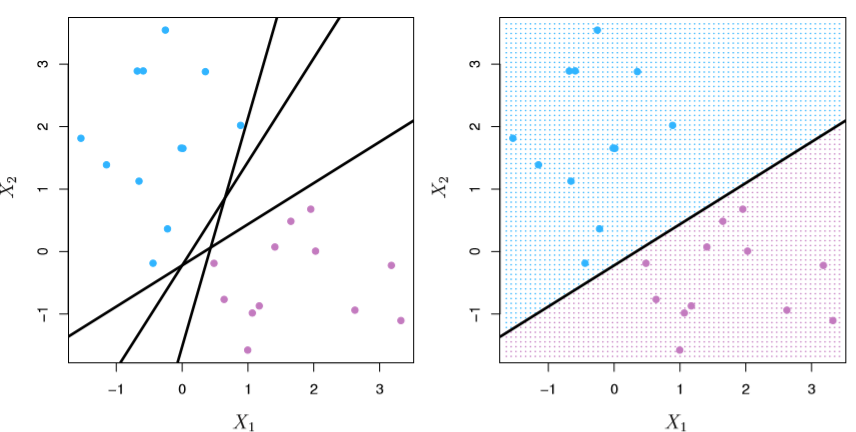

In [1]:
from IPython.display import Image

Image('images/fig_9_2.PNG')

Generally, this line takes the form

$f(x) = \beta_0 + \beta_1 X_1 + \dots + \beta_P X_P = 0$

Where `=0` is how we establish our boundary between classes. Extending from this, when we consider each training point `X`, this equation should hold such that

$\beta_0 + \beta_1 X_1 + \dots + \beta_P X_P > 0$

if `y=1`, the first class, and

$\beta_0 + \beta_1 X_1 + \dots + \beta_P X_P < 0$

if `y=-1`, the other class.

Equivalently, we can say that

$y (\beta_0 + \beta_1 X_1 + \dots + \beta_P X_P) > 0$

for every `y_i, X_i`. **This equation will be the jumping-off point for the math in our next few sections**.

This should click, intuitively, as:

- Class A points, `y=1`, will have a positive value in the parentheses
- Class B points will have a negative value in the parentheses, but this will be negated by multiplying by the `y=-1`

Furthermore, *magnitude of the parentheses term matters*. That's to say that when the absolute value of the left-hand side of the equation is very large, then we're very confident in our prediction.

### Fitting the *Best* Line

As you can see in the left-hand figure above, there are potentially infinite solutions to "what lines separate our data?"

If we define the *margins* as the distances from the points to our hyperplane, we can define the *Maximal Margin Classifier* as the hyperplane that maximizes the size of all of these margins.

Put another way, we want to find the *widest slab" that we can insert between our two classes*, which looks like

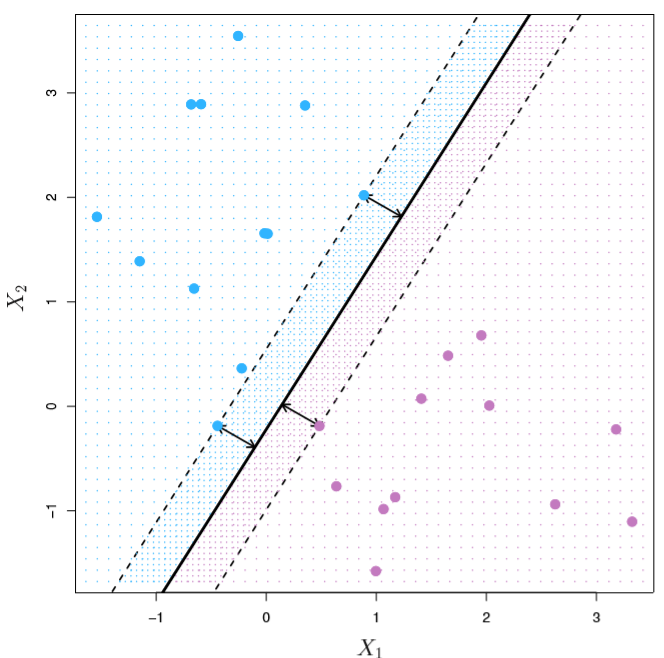

In [2]:
Image('images/fig_9_3.PNG')

More terminology, we call the data points on the margins our *support vectors*. And they serve as the most important points of data in our whole set, by a mile.

In fact, our correct hyperplane placement **only** depends on the location of these points. All others can be strewn about arbitrarily, so long as they don't pass over the margins.

**Note**: This makes SVMs *much* more reliant to outlier data

Mathematically, this means that the actual solve/optimization that we're doing is choosing our `Beta_0, ..., Beta_P` terms so that they yield the largest value of `M` for which the following holds

$y (\beta_0 + \beta_1 X_1 + \dots + \beta_P X_P) \geq M$

Thus `M` becomes the amount of wiggle room that we have when we place our hyperplane-- the arrows in the figure above.

Additionally, we optimize with the constraint that the sum of squared values of each `Beta` equals `1` so that all `y * (stuff)` values are perpendicular to the hyperplane, according to Math™

In a world with perfectly-separable classes, there are no hyperparameters to tune. This *is* the most-correct solution.

### Support Vector Classifier

Now, relaxing the niceities of the examples above, we'll build out a *Support Vector Classifier*.

First off, our data won't always be perfectly separable. You can imagine the scatter above with the errant blue dot comingled with the purple and vice-versa.

Secondly, our *best* solution in the perfectly-separable case is wildly-sensitive to the introduction of new data points. See what happens when we literally add *one* blue point.

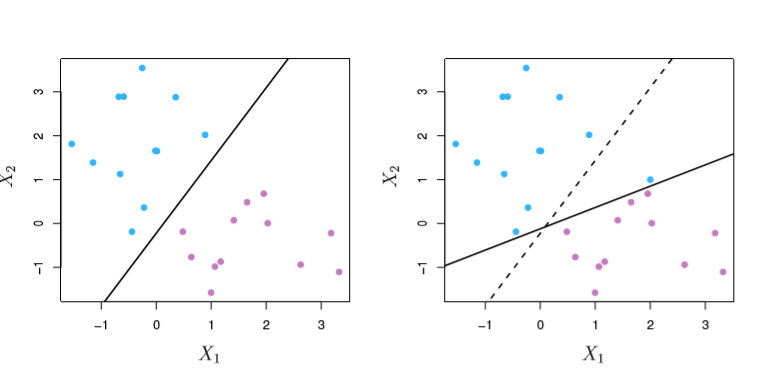

In [3]:
Image('images/fig_9_5.PNG')

And so we want a classifier that considers both, with a degree of tolerance, so that it isn't so sensitive to new data points.

We do this by changing our last `M` term in our basic equation to

$\geq M(1 - \epsilon_i)$

These `epsilon` terms are called "slack variables" and are tuned to every *data point*, not feature. They are constrained by

$\epsilon_i \geq 0 \quad \forall i \quad, \quad \sum_{i=1}^{n} \epsilon_i \leq C$

As bound by some Constraining parameter, `C`. And so now there is no cut-and-dry *best* hyperplane. We pick our `C` value and let the optimizer do its thing.

This leads to an optimization over `p` different `Beta` terms and `n` different `epsilon` terms. Messy stuff. Instead of getting into the minutiae of the calculation, a few insights into our new running equation:

$y (\beta_0 + \beta_1 X_1 + \dots + \beta_P X_P) \geq M(1 - \epsilon_i)$

Looking at the slack variables with respect to the `i`th observation:

- `epsilon_i=0` means that the righthand term is just `>= M`, so our `i`th observation is on the correct side of the margin
- `0 < epsilon_i < 1` means that the righthand term is a *fraction* of `M`, so the point is on the right side of the hyperplane and on the wrong side of the margin-- points 1 and 8 below
- `epsilon_i > 1` means that we've got a *negative* `M` value and the point is on the wrong side of the hyperplane-- points 12 and 11 below

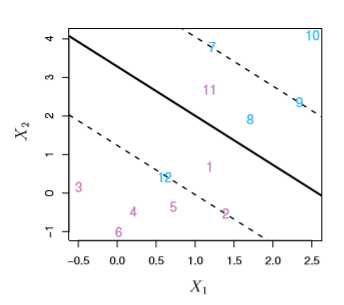

In [4]:
Image('images/fig_9_6.PNG')

In a sense, we can think of `C` as a sort of "budget" for our `epsilon` values. Effectively this gives us a lever for the Bias/Variance tradeoff, and is best-chosen via Cross Validation.

Revisiting the name "Support Vector Classifier", this algorithm will, as above, leverage the *Support Vectors* that we identified on the margins earlier.

**This is the crucial throughline of this notebook**: The fit of our decision boundary is informed almost entirely by the points defined by our margins.

Also as above, we're less concerned with outlier data for this very same reason. This proves to be more robust than LDA or Logistic Regression in that regard.

## Support Vector Machines

When we have intermixed data, the main goal then becomes finding some way to map each point into a higher-dimensional space, then formulate some sort of hyperplane that handles the separation as outlined above.

A simple example of this is seen below, as we map our linear data at the top to a quadratic form and cut accordingly.

When we have intermixed data, the main goal then becomes finding some way to map each point into a higher-dimensional space, then formulate some sort of hyperplane that handles the separation as outlined above.

A simple example of this is seen below, as we map our linear data at the top to a quadratic form and cut accordingly.

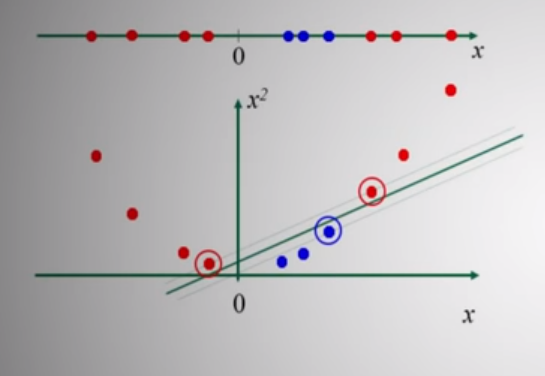

In [5]:
Image('images/svm_linear_to_quad.PNG')

Generally, this is achieved via a technique called *kernelization*. I'll omit the gritty details (he writes at 10:46pm after a day of reading them, haha), and instead summarize with this:

- Though they can ultimately give us transformations into many-dimensional space, the Kernel functions are quite computationally efficient due to something called the "kernel trick"
- It can be shown (and indeed has in the MIT video below) that despite how complicated the math winds up getting, both the optimization and the decision only depend on *the dot product between our pairwise `x` vectors*
- **Crucially**, this means that instead of actually calculating all of the covariance values and higher-dimensional projection, we can simply project the inner product between two vectors, and the relationships will still hold.
- Finally, the Kernel Matrix has a useful property in that it's symmetric-- allowing us to nearly half on the cost, when considering all pairwise calculations.
- Furthermore, in the way of computation, as we've stressed a number of times in this notebook, only a small subset of original `X` values actually determine the behavior of our SVMs-- our *support vectors*. Thus, we can limit all of the `X` values we calculate with to those found within `S`, the set of all points found between the margins of our hyperplane.

We rewrite our final prediction function as

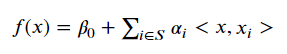

In [6]:
Image('images/svm_slack.PNG')

## Different Kernels

The most popular kernels for use in SVMs are all ultimately some proxy for "similarity of one point to another".

The hyperparameters, `d` and `gamma`, respectively, are tuned using our typical method of Cross Validation

### Polynomial

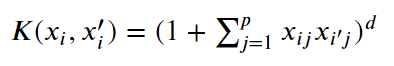

In [7]:
Image('images/polynomial_kernel.PNG')

Which takes the form of the left image

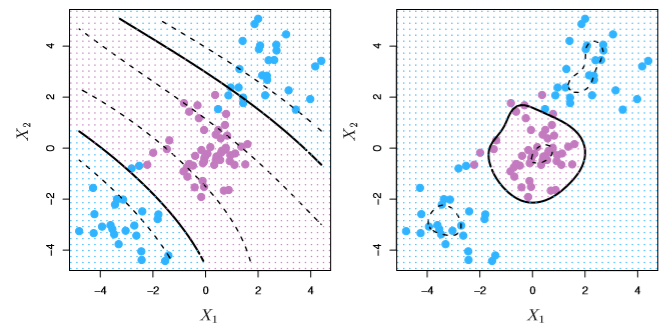

In [8]:
Image('images/fig_9_9.PNG')

### Radial

Takes the form of the right

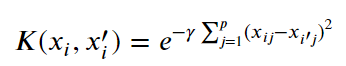

In [9]:
Image('images/radial_kernel.PNG')

Intuitively, when our new point `x'` is far from `x`, we expect the exponent to be large and the whole term goes to zero.

This biases toward local behavior and acts as a sort of "weighted nearest neighbors"-adjacent algorithm.

## Resources

- [Augmented Startups video](https://www.youtube.com/watch?v=Y6RRHw9uN9o): Short, and does a great job visualizing hyperplane slices using kernels

- [Statsquest on SVMs](https://www.youtube.com/watch?v=efR1C6CvhmE): From Max Margin Classifiers through SVMs. Emphasis on simple explanations!

- [MIT SVM lecture](https://www.youtube.com/watch?v=_PwhiWxHK8o): Excellent lecture. Goes into the math of why we're only concerned with dot product of `x` values

- [JakeVDP blogpost](https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html): Doing this stuff in Python

- [Stats and Bots on Medium](https://blog.statsbot.co/support-vector-machines-tutorial-c1618e635e93): More kernel intuition. Talks a bit about the difference in computational complexity using kernals vs not

- [Udacity Kernel Trick](https://www.youtube.com/watch?v=N_r9oJxSuRs): Very short. Finally helped the notion of the Kernel as a "similarity function" click

- [Andrew Ng SVM/Kernels](https://www.youtube.com/watch?v=mTyT-oHoivA): Further reinforces "Kernels and Similarity" notion

- [Alice Zhao on YouTube](https://www.youtube.com/watch?v=N1vOgolbjSc): Excellent tutorial on doing end to end SVM, with real data